In [5]:
import scipy.io as sio  
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
import dan_utils

In [6]:
dan_utils.setup_seed(25)

# Execute "dataprocess.m"

In [7]:
data = []
data = sio.loadmat('./XGBoost/data2_6.mat')    #在Python中读取的.mat为字典格式

input done
[04:42:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




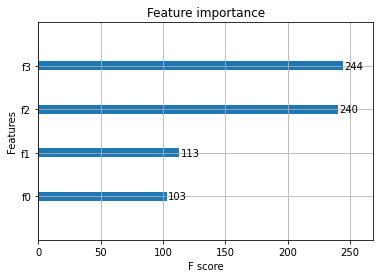

In [8]:
x_train = data['x_train']
x_train[x_train==0] = 0.001
y_train = abs(data['y_train'])
y_train[y_train==0] = 0.001
x_test = data['x_test']
y_test = data['y_test']
y_train = np.reshape(y_train, [np.shape(y_train)[0]])
y_test = np.reshape(y_test, [np.shape(y_test)[0]])
print('input done')


params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0.1,
    'max_depth': 5,
    'lambda': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

dtrain = xgb.DMatrix(x_train, y_train)
num_rounds = 66
plst = list(params.items())
model = xgb.train(plst, dtrain, num_rounds)

# 对测试集进行预测
dtest = xgb.DMatrix(x_test)
ans = model.predict(dtest)

# 显示重要特征
plot_importance(model)
plt.show()

sio.savemat('./XGBoost/result5.mat',{'pre': ans,'true': y_test})

# Execute "cal_ecdf.m"